## Upload and Read the Text Files

In [1]:
from IPython.display import display, HTML
from ipywidgets import FileUpload

# File uploader widgets
uploader_automated = FileUpload(accept='.txt', multiple=False)
uploader_manual = FileUpload(accept='.txt', multiple=False)

# Text labels before Upload Button
display(HTML("<h4>Upload Automated Text File:</h4>"))
display(uploader_automated)

display(HTML("<h4>Upload Manual Text File:</h4>"))
display(uploader_manual)

FileUpload(value=(), accept='.txt', description='Upload')

FileUpload(value=(), accept='.txt', description='Upload')

In [2]:
# Check if both files have been uploaded
if uploader_automated.value and uploader_manual.value:
    # Get the file content directly from the FileUploaded widget
    automated_file = uploader_automated.value[0]
    manual_file = uploader_manual.value[0]
    
    # Convert the memoryview to bytes and then decode to string
    automated_text = automated_file['content'].tobytes().decode('utf-8')
    manual_text = manual_file['content'].tobytes().decode('utf-8')

    # Show first 500 characters of both texts for confirmation
    print("Automated Text:", automated_text[:500])
    print("Manual Text:", manual_text[:500])
else:
    print("Please upload both the automated and manual text files.")

AbstractManaging a system can be critical for its snd Governance
Abstract—Managing a system can be critical for its successful functioning. This is especially crucial for the socio-technical systems of systems (SoS) that characterize many of modern society’s critical operations. However, the management of SoS


<!--  -->

## Preprocess the Texts

In [3]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocess text from both the files
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
    return text

# Preprocess both texts
automated_text_cleaned = preprocess_text(automated_text)
manual_text_cleaned = preprocess_text(manual_text)

print("Preprocessed Automated Text:", automated_text_cleaned[:500])
print("Preprocessed Manual Text:", manual_text_cleaned[:500])

Preprocessed Automated Text:  1 systems of systems management and governance from a risk handling perspective marjorie nawila pettersson jakob axelsson computer science and software engineering m alardalen university v aster as sweden marjorie pettersson jakob axelsson mdu se anna johansson economy and political science m alardalen university v aster as sweden anna johansson mdu se pontus svenson rise research institutes of sweden kista sweden 2 pontus svenson ri se abstractmanaging a system can be critical for its successf
Preprocessed Manual Text:  systems of systems management and governance from a risk handling perspective marjorie nawila pettersson jakob axelsson computer science and software engineering ma lardalen university va stera s sweden marjorie pettersson jakob axelsson mdu se abstract managing a system can be critical for its successful functioning this is especially crucial for the socio technical systems of systems sos that characterize many of modern society s critica

<!--  -->

## Vectorization

In [4]:
 ## Converting texts to TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Combine the texts into a list for vectorization
texts = [automated_text_cleaned, manual_text_cleaned]

# Fit and transform the texts
tfidf_matrix = vectorizer.fit_transform(texts)

# Convert the TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()

print("TF-IDF Vector for Automated Text:\n", tfidf_array[0][:10])  # Print first 10 values
print("TF-IDF Vector for Manual Text:\n", tfidf_array[1][:10])  # Print first 10 values

TF-IDF Vector for Automated Text:
 [0.01731441 0.00486696 0.00692577 0.00486696 0.00486696 0.00486696
 0.00486696 0.00486696 0.00692577 0.00486696]
TF-IDF Vector for Manual Text:
 [0.01748798 0.         0.0034976  0.         0.         0.
 0.         0.         0.0034976  0.        ]


<!--  -->

## Clustering

In [5]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_array)

# Labels of the clusters
labels = kmeans.labels_

print("Cluster Labels:", labels)

Cluster Labels: [0 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<!--  -->

## Cluster Comparison

In [6]:
from sklearn.metrics import adjusted_rand_score

# Assuming the manual text is the ground truth with label 1
manual_labels = [0, 1]  # [0 for automated, 1 for manual]

# Compare the clusters
ari = adjusted_rand_score(manual_labels, labels)
print(f'Adjusted Rand Index (ARI) between the clusters: {ari}')

Adjusted Rand Index (ARI) between the clusters: 1.0


<!--  -->

Text Similarity Measurement Example

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert texts to a vector using TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([automated_text_cleaned, manual_text_cleaned])

# Calculate cosine similarity between the two texts
similarity = cosine_similarity(vectors[0:1], vectors[1:2])
print(f"Cosine Similarity between texts: {similarity[0][0]:.4f}")

Cosine Similarity between texts: 0.9981


<!--  -->

## Visualization Example (Word Cloud)

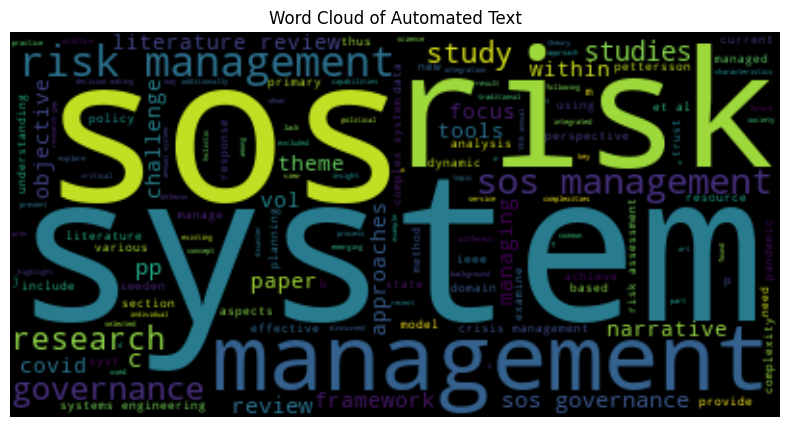

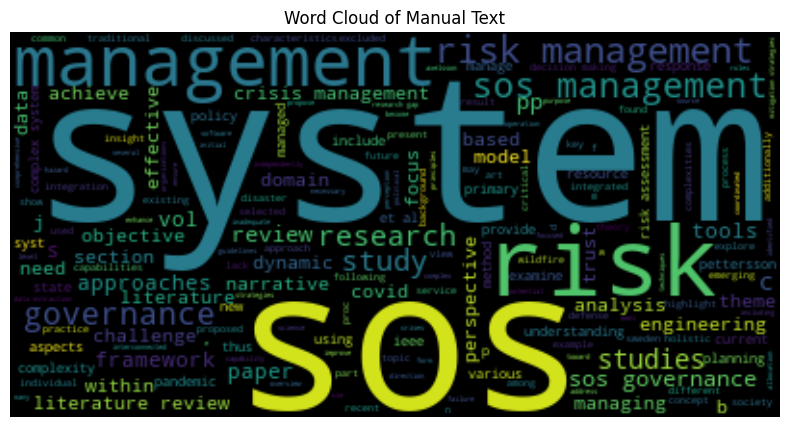

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for automated text
wordcloud_automated = WordCloud().generate(automated_text_cleaned)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_automated, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Automated Text")
plt.show()

# Generate word cloud for manual text
wordcloud_manual = WordCloud().generate(manual_text_cleaned)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manual, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Manual Text")
plt.show()

<!--  -->

## Difference Detection

In [27]:
import difflib

# Calculating differences between the cleaned texts
differ = difflib.Differ()
diff = list(differ.compare(automated_text_cleaned.splitlines(), manual_text_cleaned.splitlines()))

print("\n".join(diff[:10]))  # Show first 10 lines of difference.

-  1 systems of systems management and governance from a risk handling perspective marjorie nawila pettersson jakob axelsson computer science and software engineering m alardalen university v aster as sweden marjorie pettersson jakob axelsson mdu se anna johansson economy and political science m alardalen university v aster as sweden anna johansson mdu se pontus svenson rise research institutes of sweden kista sweden 2 pontus svenson ri se abstractmanaging a system can be critical for its successful functioning 3 this is especially crucial for the socio technical systems of systems sos that characterize many of modern societys critical operations 4 however the management of sos becomes complex as systems are increasingly interconnected and the dependence among connected systems intensifies 5 this paper explores the current state of the art on sos management and governance from a risk management perspective 6 our findings show a higher focus on sos management however many studies do not

## Visualization

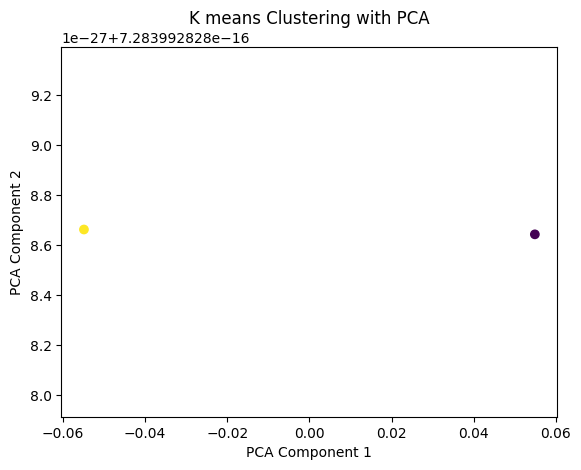

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('K means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

<!--  -->

 ## Calculation for Information Extraction:

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Preprocess text (already done in your code)
automated_text_cleaned = preprocess_text(automated_text)
manual_text_cleaned = preprocess_text(manual_text)

# Split texts into lists of words
true_labels = manual_text_cleaned.split()  # Ground truth (manual extraction)
predicted_labels = automated_text_cleaned.split()  # Predicted labels (automated extraction)

# Ensure same length by using set intersection or any alignment method
common_words = set(true_labels).intersection(set(predicted_labels))

# Binary labels based on common words
true_binary = [1 if word in common_words else 0 for word in true_labels]
predicted_binary = [1 if word in common_words else 0 for word in predicted_labels]

# Ensure both lists have the same length
min_len = min(len(true_binary), len(predicted_binary))
true_binary = true_binary[:min_len]
predicted_binary = predicted_binary[:min_len]

# Calculate Precision, Recall, and F1-Score
precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)
f1 = f1_score(true_binary, predicted_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9923
Recall: 0.9461
F1-Score: 0.9687


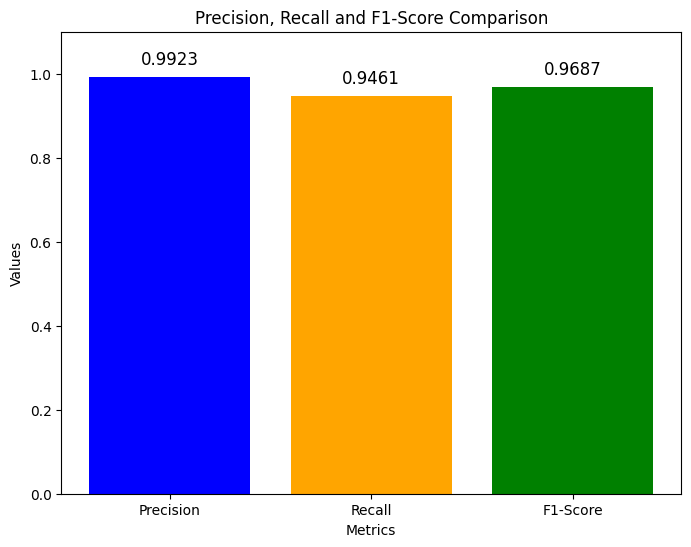

In [14]:
import matplotlib.pyplot as plt


metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

# plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1.1)  

# title and labels
plt.title('Precision, Recall and F1-Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Values')

# plot bar chart
for i, v in enumerate(values):
    plt.text(i, v + 0.03, f"{v:.4f}", ha='center', fontsize=12)

plt.show()

<!--  -->

# Start Clustering

### Preprocess the Text

In [15]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer


def preprocess_text(text): 
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)# Remove punctuation and special characters
    return text

automated_text_cleaned = preprocess_text(automated_text)
manual_text_cleaned = preprocess_text(manual_text)

# Combine both texts into a list for vectorization
texts = [automated_text_cleaned, manual_text_cleaned]

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (2, 1487)


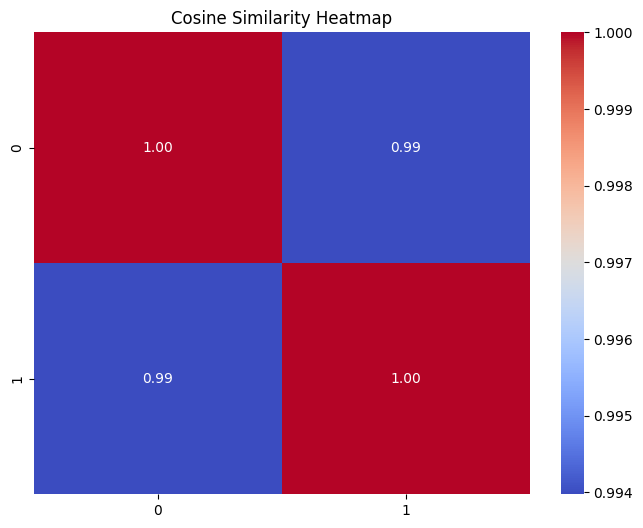

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Heatmap')
plt.show()

<!--  -->

### K-means Clustering

In [17]:
from sklearn.cluster import KMeans

# K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# cluster labels for each text
labels = kmeans.labels_

print("Cluster Labels:", labels)

Cluster Labels: [0 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualize the Clusters

In [18]:
from sklearn.metrics import adjusted_rand_score


true_labels = [0, 1]  # 0 for automatic, 1 for manual

# Calculate ARI
ari_score = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index (ARI) between the clusters: {ari_score:.4f}")

Adjusted Rand Index (ARI) between the clusters: 1.0000


In [19]:
import pandas as pd

# Get feature names 
features = vectorizer.get_feature_names_out()

# Get the TF-IDF scores for each text
tfidf_scores = tfidf_matrix.toarray()

# Creating DataFrame 
df_automated = pd.DataFrame(tfidf_scores[0], index=features, columns=['TF-IDF']).sort_values(by='TF-IDF', ascending=False)
df_manual = pd.DataFrame(tfidf_scores[1], index=features, columns=['TF-IDF']).sort_values(by='TF-IDF', ascending=False)

print("Top words in Automated Text:")
print(df_automated.head(10))

print("\nTop words in Manual Text:")
print(df_manual.head(10))

Top words in Automated Text:
              TF-IDF
sos         0.540210
management  0.529821
risk        0.328974
systems     0.301271
governance  0.183533
research    0.121201
review      0.107349
study       0.093498
studies     0.090035
literature  0.083109

Top words in Manual Text:
              TF-IDF
sos         0.549123
management  0.535132
risk        0.332272
systems     0.290300
governance  0.181875
research    0.118918
review      0.111923
study       0.097933
studies     0.090937
literature  0.080445


Cluster Labels: [0 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


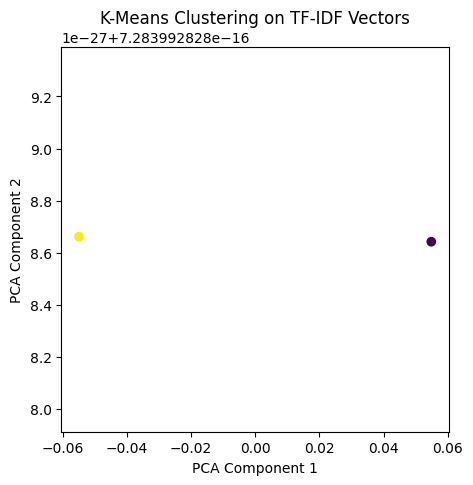

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix.toarray())  # Convert sparse matrix to dense if necessary

# Cluster labels for each text
labels = kmeans.labels_
print("Cluster Labels:", labels)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Create the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')


plt.title('K-Means Clustering on TF-IDF Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

<!--  -->

 ## Agglomerative Clustering:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


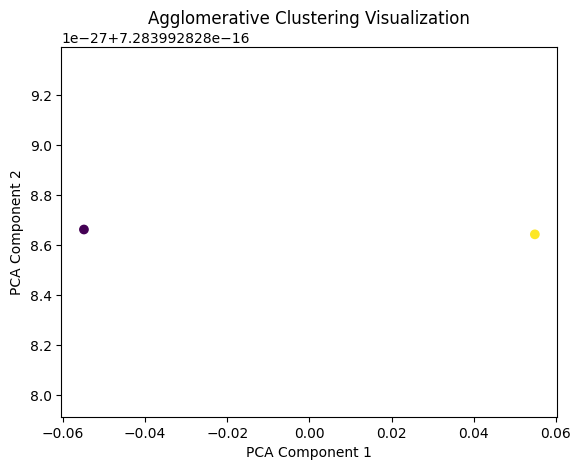

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
agg_labels = agg_clustering.fit_predict(tfidf_matrix.toarray())

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [24]:
# Cluster labels from the Agglomerative Clustering
agg_labels = agg_clustering.labels_

print("Cluster Labels:", agg_labels)

Cluster Labels: [1 0]


In [25]:

cluster_0_texts = [text for label, text in zip(agg_labels, texts) if label == 0]
cluster_1_texts = [text for label, text in zip(agg_labels, texts) if label == 1]

print(f"Cluster 0 Texts (Count: {len(cluster_0_texts)}):\n", cluster_0_texts)
print(f"Cluster 1 Texts (Count: {len(cluster_1_texts)}):\n", cluster_1_texts)

Cluster 0 Texts (Count: 1):
 [' systems of systems management and governance from a risk handling perspective marjorie nawila pettersson jakob axelsson computer science and software engineering ma lardalen university va stera s sweden marjorie pettersson jakob axelsson mdu se abstract managing a system can be critical for its successful functioning this is especially crucial for the socio technical systems of systems sos that characterize many of modern society s critical operations however the management of sos becomes complex as systems are increasingly interconnected and the dependence among connected systems intensifies this paper explores the current state of the art on sos management and governance from a risk management perspective our findings show a higher focus on sos management however many studies do not holistically deal with the sos moreover our findings indicate fewer studies in sos governance hence there is still a research gap the study contributes to the body of knowl

In [26]:
from collections import Counter

def get_top_words(texts, n=10):
    word_counter = Counter()
    for text in texts:
        word_counter.update(text.split())
    return word_counter.most_common(n)

# Get top words for each cluster
top_words_cluster_0 = get_top_words(cluster_0_texts)
top_words_cluster_1 = get_top_words(cluster_1_texts)

print("Top Words in Cluster 0:\n", top_words_cluster_0)
print("Top Words in Cluster 1:\n", top_words_cluster_1)

Top Words in Cluster 0:
 [('the', 247), ('and', 234), ('of', 186), ('sos', 157), ('management', 153), ('a', 126), ('in', 102), ('risk', 95), ('to', 92), ('systems', 83)]
Top Words in Cluster 1:
 [('the', 249), ('and', 238), ('of', 192), ('sos', 156), ('management', 153), ('a', 129), ('in', 101), ('risk', 95), ('to', 93), ('systems', 87)]



### Final Thoughts:

This analysis confirms that the automated text extraction method is highly effective and closely mirrors the manual process. Any minor differences identified can serve as opportunities for further improvement to make the automated process even more reliable and accurate.

